# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 604


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL

url =  f'http://api.openweathermap.org/data/2.5/weather?units=metric&appid={weather_api_key}'

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | port-aux-francais
Processing Record 2 of Set 1 | kas
Processing Record 3 of Set 1 | aykhal
Processing Record 4 of Set 1 | puerto natales
Processing Record 5 of Set 1 | fortuna
Processing Record 6 of Set 1 | tralee
Processing Record 7 of Set 1 | ziro
Processing Record 8 of Set 1 | puerto ayora
Processing Record 9 of Set 1 | isafjordur
Processing Record 10 of Set 1 | yerofey pavlovich
Processing Record 11 of Set 1 | susuman
Processing Record 12 of Set 1 | port mathurin
Processing Record 13 of Set 1 | olonkinbyen
Processing Record 14 of Set 1 | sisimiut
Processing Record 15 of Set 1 | edinburgh of the seven seas
Processing Record 16 of Set 1 | qiqihar
Processing Record 17 of Set 1 | adamstown
Processing Record 18 of Set 1 | weligama
Processing Record 19 of Set 1 | aasiaat
Processing Record 20 of Set 1 | ribeira grande
Processing Record 21 of Set 1 | grytviken
Processing Record 22 of Set 1 | bethel
P

Processing Record 43 of Set 4 | pangody
Processing Record 44 of Set 4 | mahajanga
Processing Record 45 of Set 4 | mount pearl
Processing Record 46 of Set 4 | petropavlovsk-kamchatsky
Processing Record 47 of Set 4 | ciudad lazaro cardenas
Processing Record 48 of Set 4 | aktau
Processing Record 49 of Set 4 | serenje
Processing Record 0 of Set 5 | kihancha
Processing Record 1 of Set 5 | barra de santo antonio
Processing Record 2 of Set 5 | lima
Processing Record 3 of Set 5 | afaahiti
Processing Record 4 of Set 5 | fale old settlement
Processing Record 5 of Set 5 | mao
Processing Record 6 of Set 5 | la rinconada
Processing Record 7 of Set 5 | porto novo
Processing Record 8 of Set 5 | kourou
Processing Record 9 of Set 5 | port-vila
Processing Record 10 of Set 5 | labrador city
Processing Record 11 of Set 5 | rio grande
Processing Record 12 of Set 5 | tuburan
Processing Record 13 of Set 5 | tolanaro
Processing Record 14 of Set 5 | vingt cinq
City not found. Skipping...
Processing Record 15 o

Processing Record 33 of Set 8 | xiva
Processing Record 34 of Set 8 | cole harbour
Processing Record 35 of Set 8 | ostersund
Processing Record 36 of Set 8 | mochudi
Processing Record 37 of Set 8 | arraial do cabo
Processing Record 38 of Set 8 | crane
Processing Record 39 of Set 8 | shenjiamen
Processing Record 40 of Set 8 | binzhou
Processing Record 41 of Set 8 | dauphin
Processing Record 42 of Set 8 | ulladulla
Processing Record 43 of Set 8 | nogliki
Processing Record 44 of Set 8 | kem'
Processing Record 45 of Set 8 | motygino
Processing Record 46 of Set 8 | onega
Processing Record 47 of Set 8 | nguigmi
Processing Record 48 of Set 8 | gidole
Processing Record 49 of Set 8 | elmendorf air force base
City not found. Skipping...
Processing Record 0 of Set 9 | gulf shores
Processing Record 1 of Set 9 | xilin hot
Processing Record 2 of Set 9 | charters towers
Processing Record 3 of Set 9 | osthofen
Processing Record 4 of Set 9 | nha trang
Processing Record 5 of Set 9 | vrangel'
Processing Re

Processing Record 22 of Set 12 | laguna
Processing Record 23 of Set 12 | bathsheba
Processing Record 24 of Set 12 | talakan
Processing Record 25 of Set 12 | tutong
Processing Record 26 of Set 12 | wabag
Processing Record 27 of Set 12 | aral
Processing Record 28 of Set 12 | bandipura
Processing Record 29 of Set 12 | i-n-salah
Processing Record 30 of Set 12 | havana
Processing Record 31 of Set 12 | timimoun
Processing Record 32 of Set 12 | bhisho
Processing Record 33 of Set 12 | huarmey
Processing Record 34 of Set 12 | dangriga
Processing Record 35 of Set 12 | vila do maio
Processing Record 36 of Set 12 | uruacu
Processing Record 37 of Set 12 | ceeldheer
Processing Record 38 of Set 12 | ibiza
Processing Record 39 of Set 12 | point pedro
Processing Record 40 of Set 12 | neiafu
Processing Record 41 of Set 12 | kruisfontein
Processing Record 42 of Set 12 | bom jardim
Processing Record 43 of Set 12 | tubmanburg
Processing Record 44 of Set 12 | safotulafai
City not found. Skipping...
Processi

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          579
Lat           579
Lng           579
Max Temp      579
Humidity      579
Cloudiness    579
Wind Speed    579
Country       579
Date          579
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,port-aux-francais,-49.3500,70.2167,7.30,89,96,14.67,TF,1683237845
1,kas,36.2018,29.6377,19.20,65,99,5.35,TR,1683237845
2,aykhal,66.0000,111.5000,-5.19,97,98,2.12,RU,1683237845
3,puerto natales,-51.7236,-72.4875,6.43,88,35,2.60,CL,1683237846
4,fortuna,40.5982,-124.1573,12.03,87,100,0.89,US,1683237630


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,port-aux-francais,-49.3500,70.2167,7.30,89,96,14.67,TF,1683237845
1,kas,36.2018,29.6377,19.20,65,99,5.35,TR,1683237845
2,aykhal,66.0000,111.5000,-5.19,97,98,2.12,RU,1683237845
3,puerto natales,-51.7236,-72.4875,6.43,88,35,2.60,CL,1683237846
4,fortuna,40.5982,-124.1573,12.03,87,100,0.89,US,1683237630


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

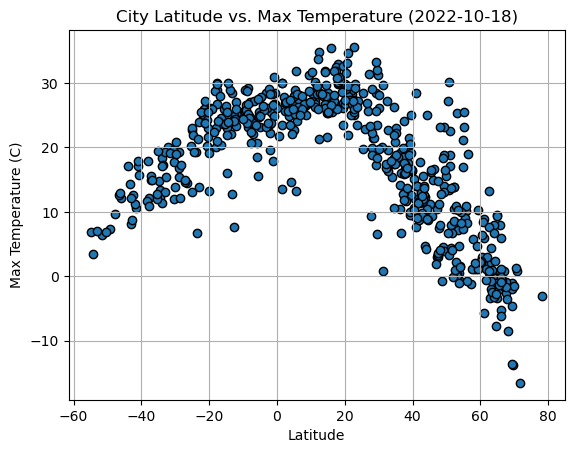

In [8]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Lat'],city_data_df['Max Temp'], edgecolors='black')
plt.title('City Latitude vs. Max Temperature (2022-10-18)')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
plt.grid()

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

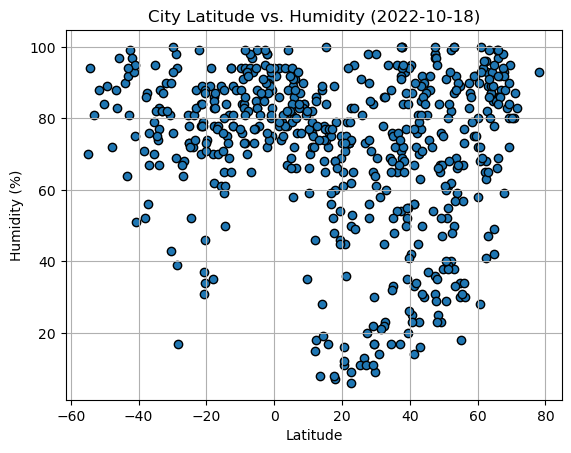

In [9]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df['Lat'],city_data_df['Humidity'], edgecolors='black')
plt.title('City Latitude vs. Humidity (2022-10-18)')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid()


# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

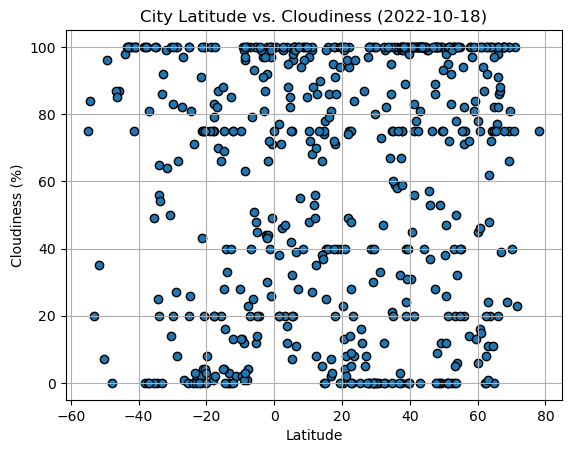

In [10]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df['Lat'],city_data_df['Cloudiness'], edgecolors='black')
plt.title('City Latitude vs. Cloudiness (2022-10-18)')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid()

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

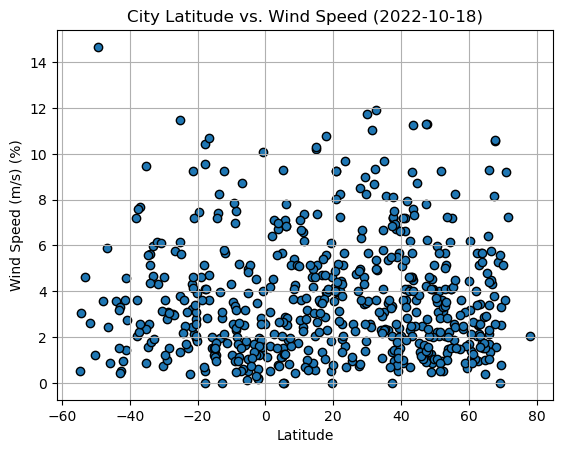

In [11]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df['Lat'],city_data_df['Wind Speed'], edgecolors='black')
plt.title('City Latitude vs. Wind Speed (2022-10-18)')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s) (%)')
plt.grid()

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
# linregress(x_values,y_values)
# line_eq = f'y ={round(slope,2)} X + {round(intercept,2)}'
# y_predict = intercept + (slope* x_values)

In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df['Lat']>=0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,kas,36.2018,29.6377,19.20,65,99,5.35,TR,1683237845
2,aykhal,66.0000,111.5000,-5.19,97,98,2.12,RU,1683237845
4,fortuna,40.5982,-124.1573,12.03,87,100,0.89,US,1683237630
5,tralee,52.2704,-9.7026,10.52,99,100,3.12,IE,1683237846
6,ziro,27.6333,93.8333,9.31,98,97,0.75,IN,1683237846


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df['Lat']<0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,port-aux-francais,-49.3500,70.2167,7.30,89,96,14.67,TF,1683237845
3,puerto natales,-51.7236,-72.4875,6.43,88,35,2.60,CL,1683237846
7,puerto ayora,-0.7393,-90.3518,30.98,88,71,2.68,EC,1683237846
11,port mathurin,-19.6833,63.4167,26.14,74,8,7.45,MU,1683237847
14,edinburgh of the seven seas,-37.0676,-12.3116,14.89,76,81,7.69,SH,1683237848


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.8495520210106339


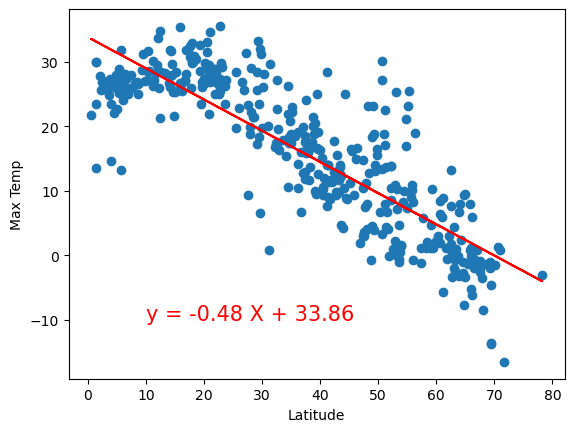

In [15]:
# Linear regression on Northern Hemisphere
x_values=northern_hemi_df['Lat']
y_values=northern_hemi_df['Max Temp']
linregress(x_values, y_values)
slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)
line_eq = f'y = {round(slope,2)} X + {round(intercept,2)}'
y_predict = intercept + (slope* x_values)
print(f'The r-value is: {rvalue}')
plt.scatter(x_values, y_values)
plt.plot(x_values,y_predict, color='r')
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.annotate(line_eq,(10,-10), color='r', fontsize=15)


# Show plot
plt.show()

The r-value is: 0.7829503271144932


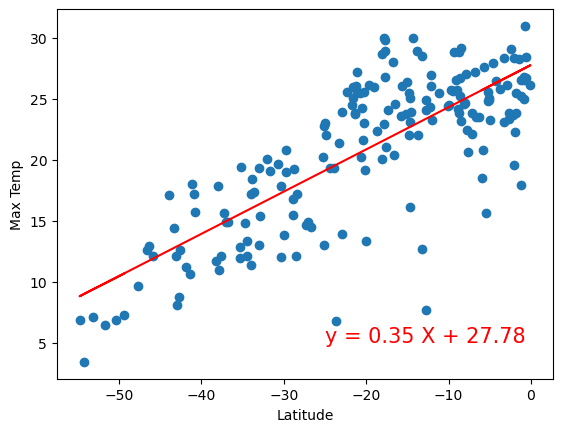

In [16]:
# Linear regression on Southern Hemisphere
x_values=southern_hemi_df['Lat']
y_values=southern_hemi_df['Max Temp']
linregress(x_values, y_values)
slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)
line_eq = f'y = {round(slope,2)} X + {round(intercept,2)}'
y_predict = intercept + (slope* x_values)
print(f'The r-value is: {rvalue}')
plt.scatter(x_values, y_values)
plt.plot(x_values,y_predict, color='r')
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.annotate(line_eq,(-25,5), color='r', fontsize=15)


# Show plot
plt.show()

**Discussion about the linear relationship:**
- In the Northern Hemisphere plot we can see a negattive correlation due to the r-value. This means that as the Latitude increases the Max Temperature decreases. We can see the r-value is correct because in the scatter plot and in the linear regression you can observe how the slope is negative.
- In the Southern Hemisphere is the other way around, the correlation is positive, as the Latitude increases, the Max Temperature increases too.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.08610252558434521


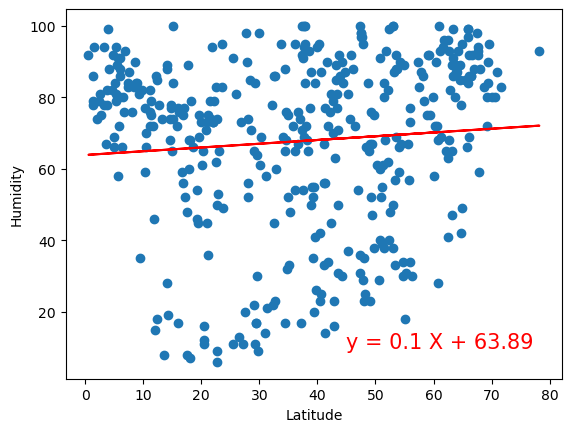

In [17]:
# Northern Hemisphere
x_values=northern_hemi_df['Lat']
y_values=northern_hemi_df['Humidity']
linregress(x_values, y_values)
slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)
line_eq = f'y = {round(slope,2)} X + {round(intercept,2)}'
y_predict = intercept + (slope* x_values)
print(f'The r-value is: {rvalue}')
plt.scatter(x_values, y_values)
plt.plot(x_values,y_predict, color='r')
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.annotate(line_eq,(45,10), color='r', fontsize=15)

plt.show()

The r-value is: 0.12750833455632132


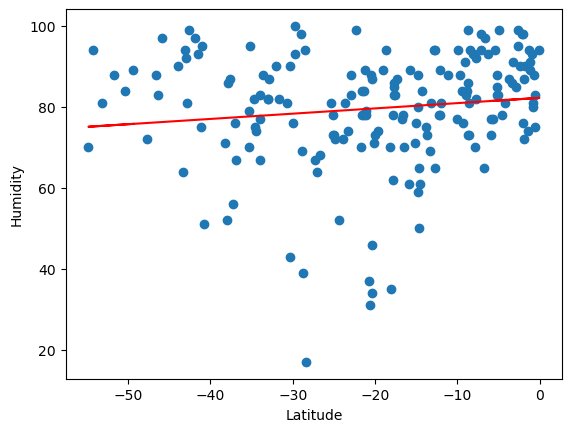

In [18]:
# Southern Hemisphere
x_values=southern_hemi_df['Lat']
y_values=southern_hemi_df['Humidity']
linregress(x_values, y_values)
slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)
line_eq = f'y = {round(slope,2)} X + {round(intercept,2)}'
y_predict = intercept + (slope* x_values)
print(f'The r-value is: {rvalue}')
plt.scatter(x_values, y_values)
plt.plot(x_values,y_predict, color='r')
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.annotate(line_eq,(-10,5), color='r', fontsize=15)
plt.show()

**Discussion about the linear relationship:** 
- Here we can observe that in BOTH hemispheres there is not a significant linear relationship, as both r-values are very close to zero. So the Humidity does not depend on the Latitude

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.07926786371125907


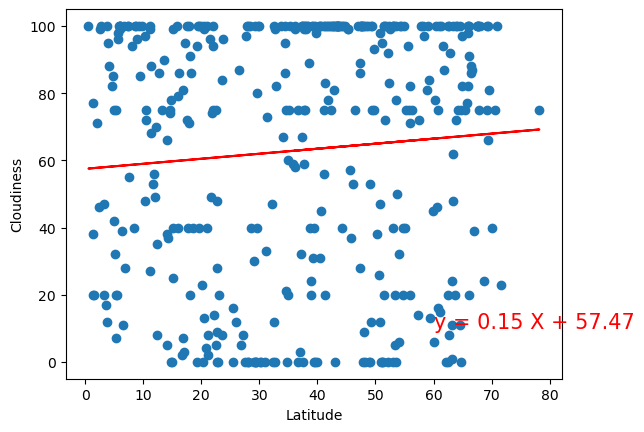

In [19]:
# Northern Hemisphere
x_values=northern_hemi_df['Lat']
y_values=northern_hemi_df['Cloudiness']
linregress(x_values, y_values)
slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)
line_eq = f'y = {round(slope,2)} X + {round(intercept,2)}'
y_predict = intercept + (slope* x_values)
print(f'The r-value is: {rvalue}')
plt.scatter(x_values, y_values)
plt.plot(x_values,y_predict, color='r')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.annotate(line_eq,(60,10), color='r', fontsize=15)
plt.show()

The r-value is: -0.06576120933731992


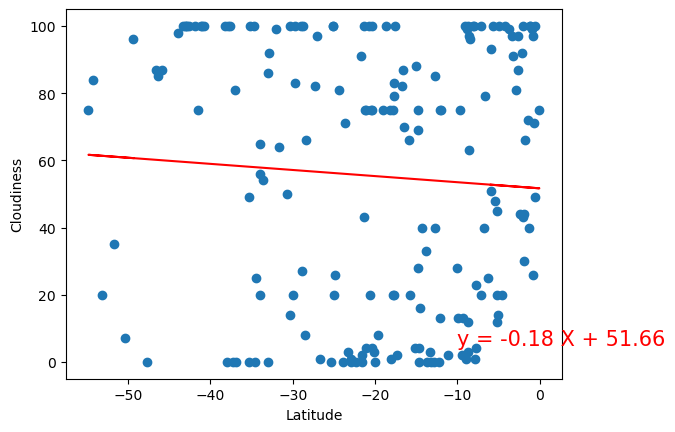

In [20]:
# Southern Hemisphere
x_values=southern_hemi_df['Lat']
y_values=southern_hemi_df['Cloudiness']
linregress(x_values, y_values)
slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)
line_eq = f'y = {round(slope,2)} X + {round(intercept,2)}'
y_predict = intercept + (slope* x_values)
print(f'The r-value is: {rvalue}')
plt.scatter(x_values, y_values)
plt.plot(x_values,y_predict, color='r')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.annotate(line_eq,(-10,5), color='r', fontsize=15)
plt.show()

**Discussion about the linear relationship:** 
- By analyzing the r-values of both graphs, it can be observed that there is no linear relationship between the cloudiness and the latitude, these two variables are not affected by each other.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: -0.05464149964756955


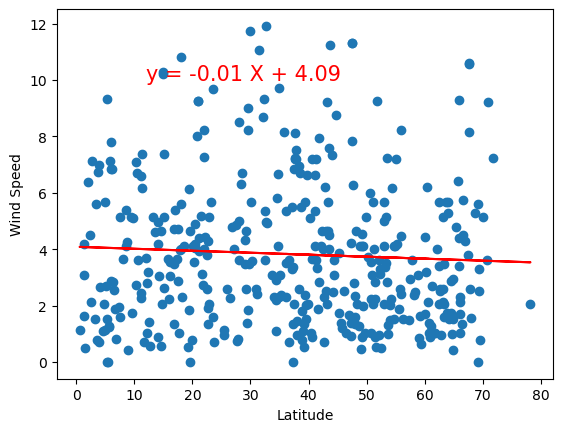

In [21]:
# Northern Hemisphere
x_values=northern_hemi_df['Lat']
y_values=northern_hemi_df['Wind Speed']
linregress(x_values, y_values)
slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)
line_eq = f'y = {round(slope,2)} X + {round(intercept,2)}'
y_predict = intercept + (slope* x_values)
print(f'The r-value is: {rvalue}')
plt.scatter(x_values, y_values)
plt.plot(x_values,y_predict, color='r')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.annotate(line_eq,(12,10), color='r', fontsize=15)
plt.show()

The r-value is: -0.13941548534772202


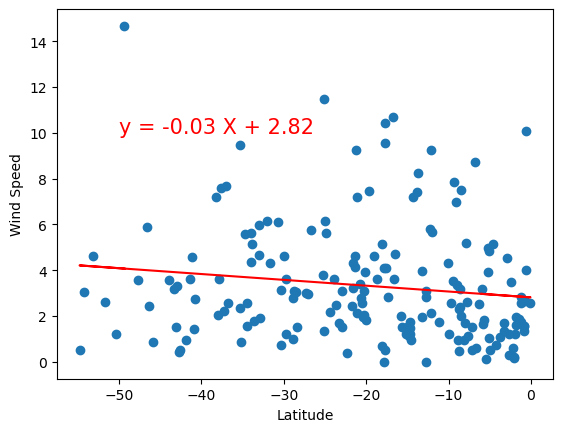

In [22]:
# Southern Hemisphere
x_values=southern_hemi_df['Lat']
y_values=southern_hemi_df['Wind Speed']
linregress(x_values, y_values)
slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)
line_eq = f'y = {round(slope,2)} X + {round(intercept,2)}'
y_predict = intercept + (slope* x_values)
print(f'The r-value is: {rvalue}')
plt.scatter(x_values, y_values)
plt.plot(x_values,y_predict, color='r')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.annotate(line_eq,(-50,10), color='r', fontsize=15)
plt.show()

**Discussion about the linear relationship:** 
- In the northern hemisphere the r-value is almost zero. Meaning that there is no correlation between the Wind Speed of the city and the Latitude. One is not affected by the other.
- In the southern hemisphere the r-value is pretty close to zero too, So it can be stated that there is no significant correlation between Wind Speed and Latitude.